**Student Name**: Varun Venkatesh

**Student Roll No**: 21F1000743


# Programming Assignment-1


There are two problems worth 100 marks. There is a problem at the end that you can attempt for bonus marks. Make a copy of the colab. Rename the colab as follows:

```
PA-1_<roll-number>.ipynb
```

We will be running your colab. It should produce the graphs/charts of the learning curves as explaind in the problem statements. Add comments wherever necessary. At the end of each problem, enter your observations in the text cell. This should include your analysis of the learning curves obtaind.

### Libraries

Stick to `NumPy` and a library such as `matplotlib`, `seaborn` or `plotly` for rendering plots.

In [ ]:
# import necessary libraries here
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3939)

## Problem 1 [65 Marks]

You will be simulating the 10-armed bandit testbed.


### Single Bandit problem

The bandit problem should have $10$ arms. For each arm, the $q_{*}(a)$ value should be sampled from a Gaussian distribution with $0$ mean and unit variance . The rewards from arm $a$ should be sampled from a Gaussian distribution with mean $q_{}(a)$  and unit variance .


### Testbed

Generate 2000 different bandit problems. Use the sample average method with incremental implementation for learning the action values. Plot the learning curves for 1000 timesteps with the following algorithms:

- gready
- $ϵ$-greedy
  - $ϵ$-0.1
  - $ϵ$-0.01

There are two learning curves for each algorithm:
- average reward vs time
- %  optimal actions vs time

You have to reproduce the following two curves:
1. Average rewards vs # of steps
2. % optimal action vs # of steps



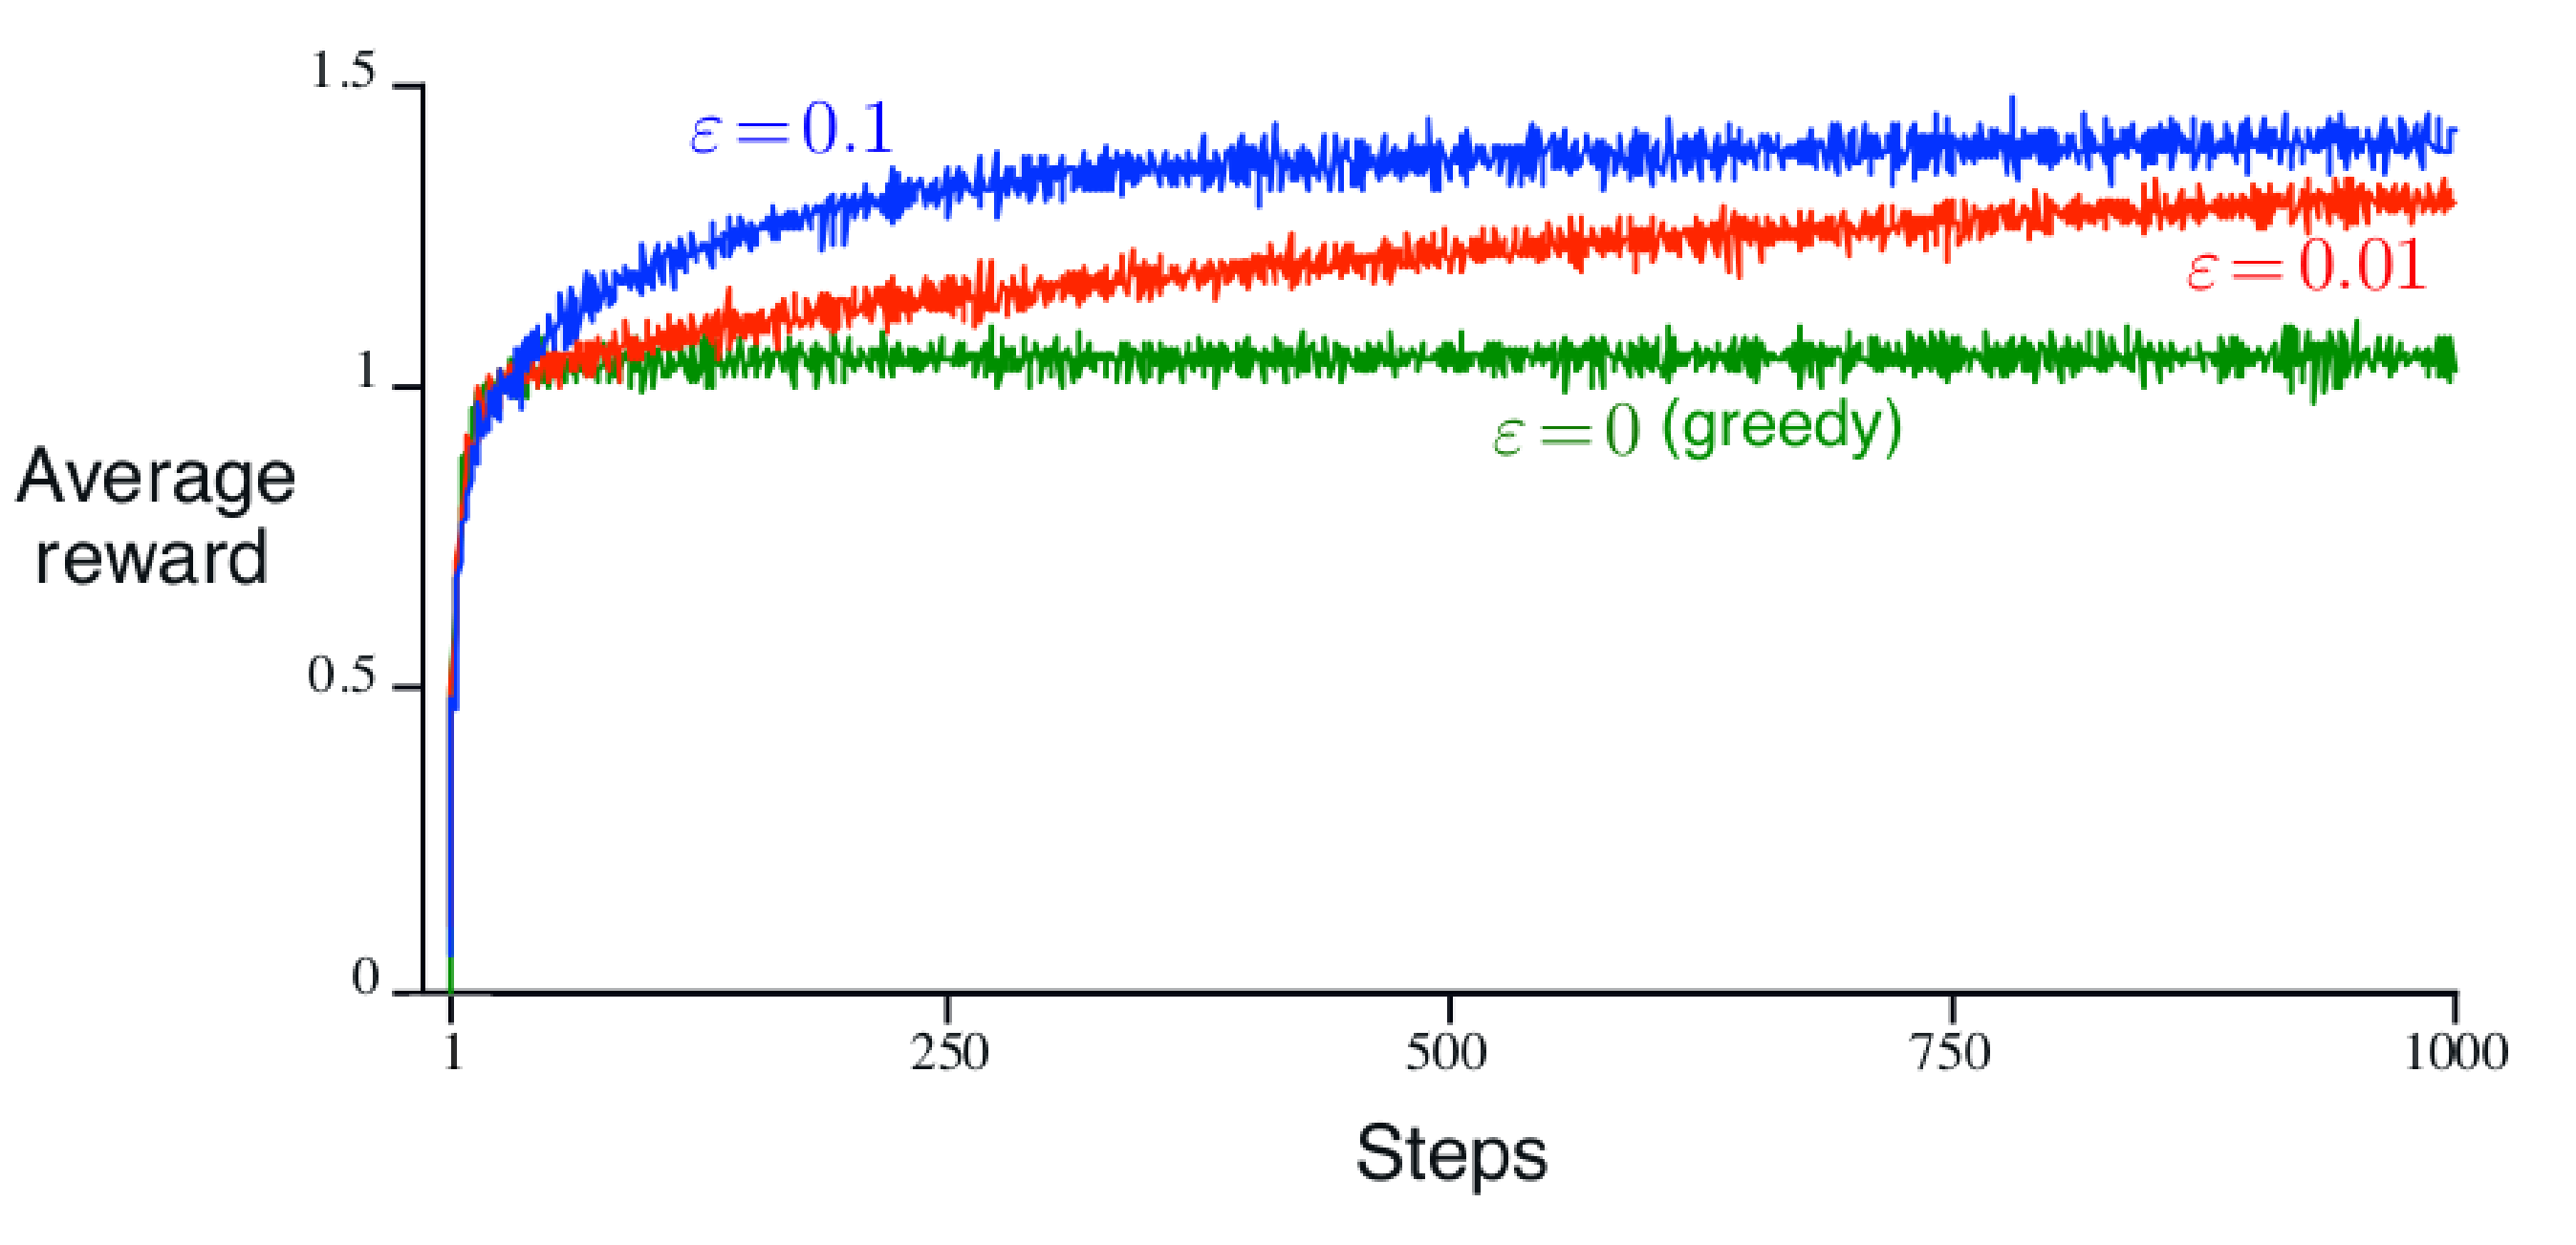

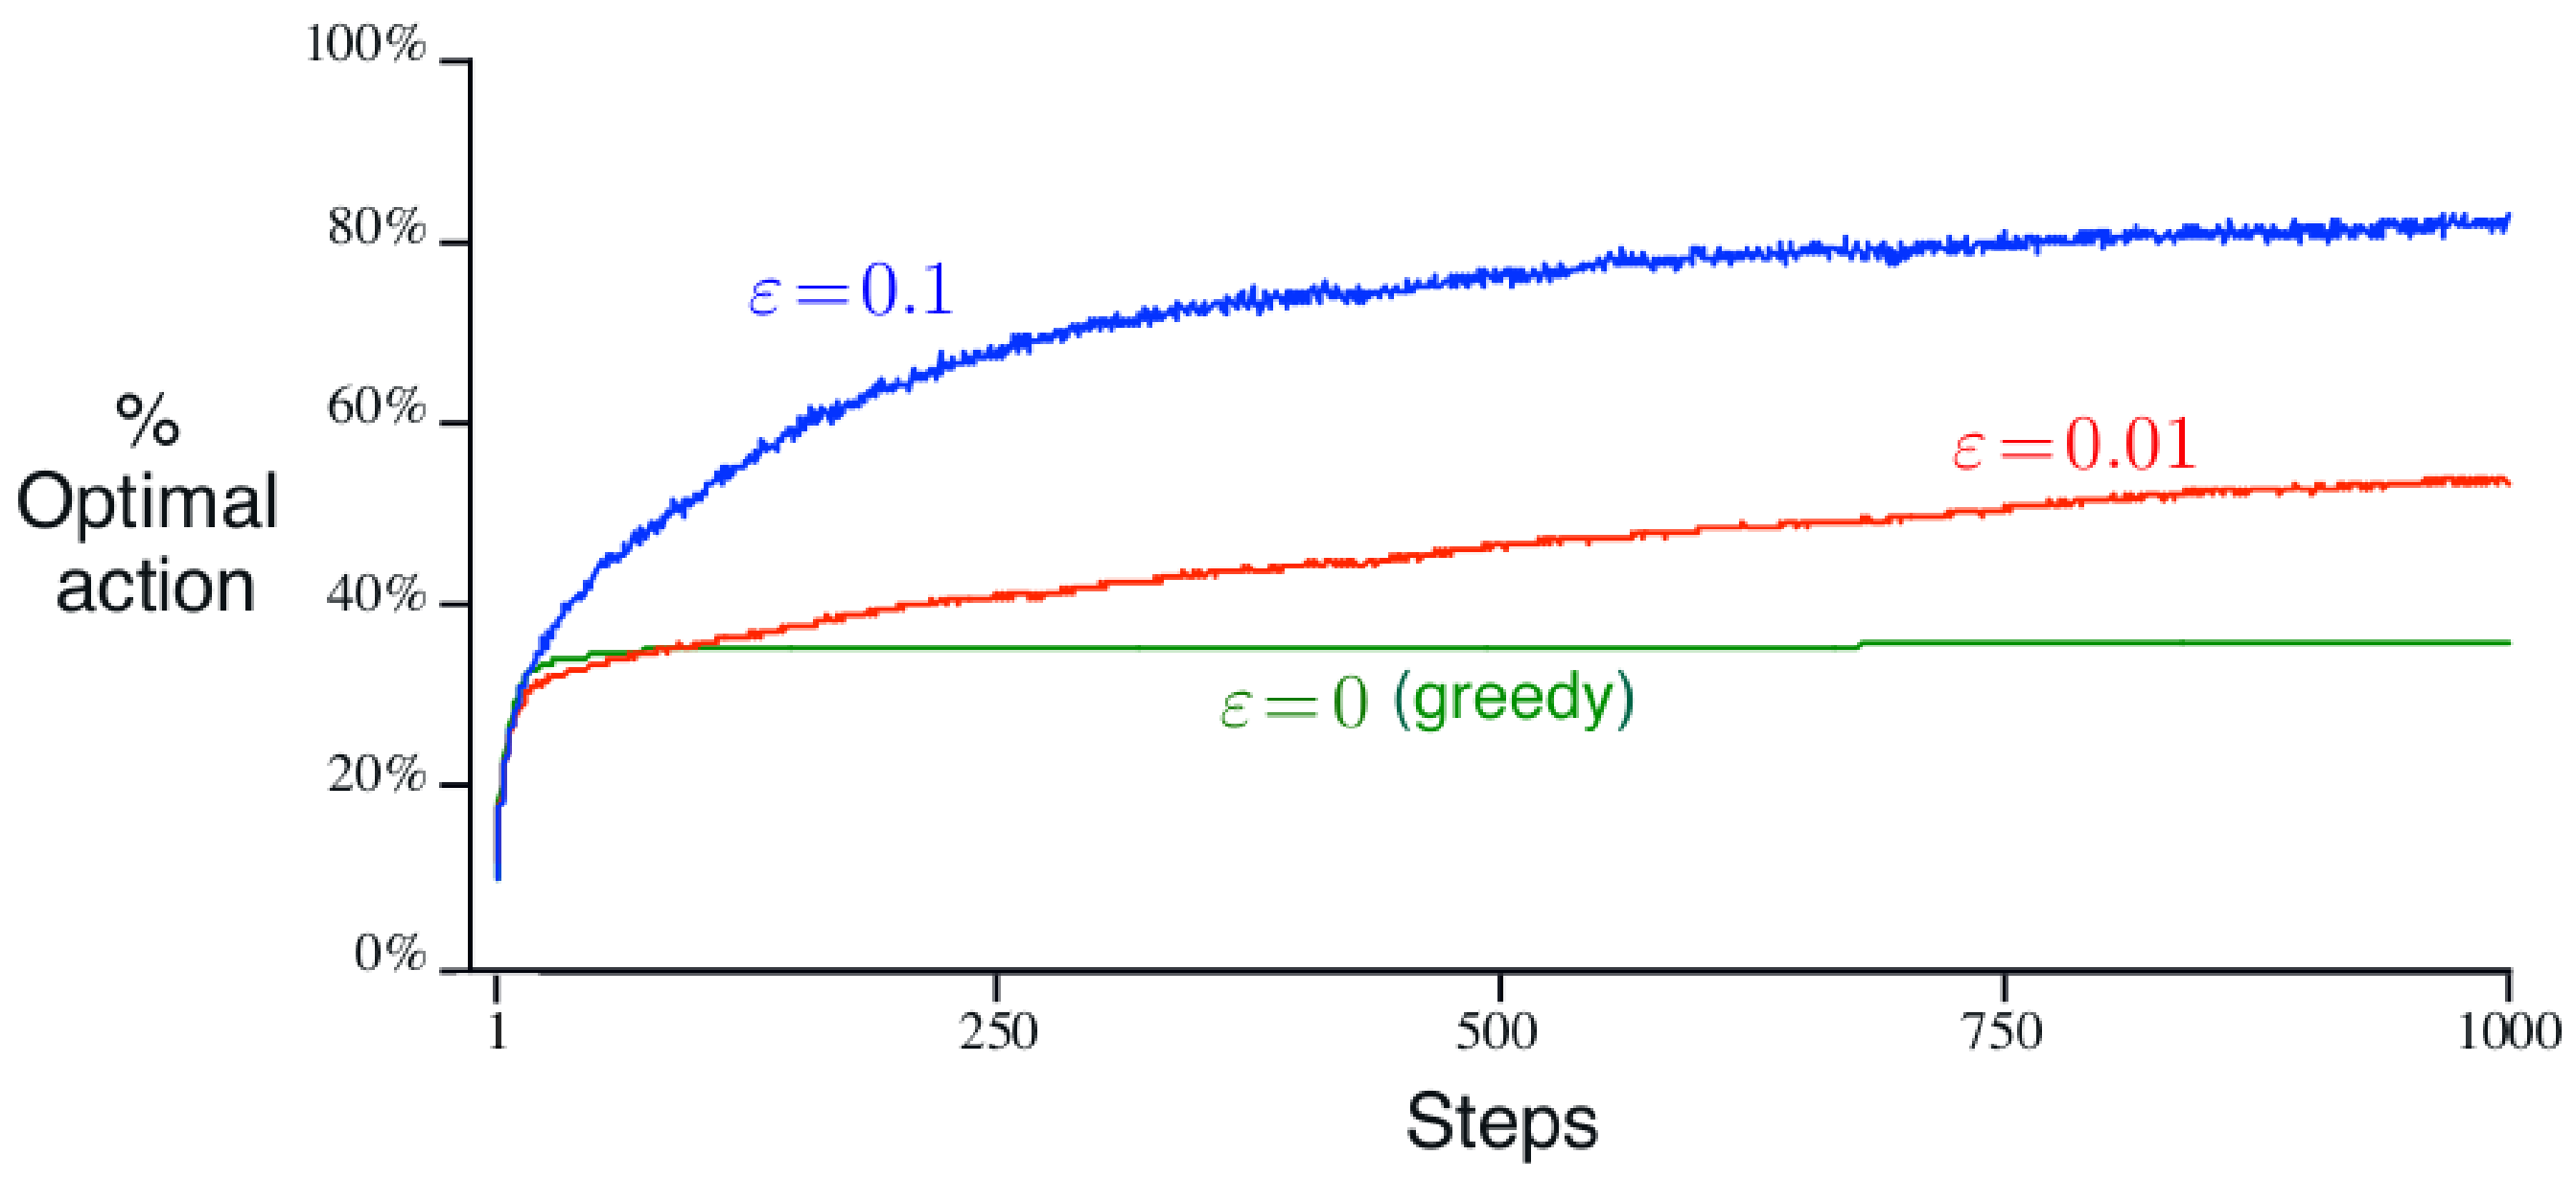

**Hint**: the averaging at each time step is done over all the 2000 bandit problems. For example, to
plot a single point $(t,r(t))$ in the "average reward plot", find the reward sampled from each of the 2000  bandits at time $t$ and compute their average. This value will be $r(t)$.

In [ ]:
def testbed(num_bandits=2000, num_arms=10, epsilon=[0,0.01,0.1], num_steps=1000, method ='eg'):

  # Dictionaries to store rewards and optimal arms chosen over time for each epsilon
  rewards_list = {}
  optimal_arm_chosen = {}

  # For each epsilon
  for eps in epsilon:
    rewards = np.zeros(num_steps)
    arms_chosen = np.zeros(num_steps)
    # Simulate for num_bandits
    for bandit in range(num_bandits):
      # True action values (reward probabilities) for each arm
      true_action_values = np.random.normal(0, 1, num_arms)
      optimal_arm = np.argmax(true_action_values)

      # Initialize variables to keep track of action values and action counts
      estimated_action_values = np.zeros(num_arms)
      action_counts = np.zeros(num_arms)

      for step in range(num_steps):
        # Simulate the epsilon-greedy algorithm
        if method == 'eg':
          # Explore with probability epsilon
          if np.random.rand() < eps:
            action = np.random.choice(num_arms)
          # Exploit with probability 1 - epsilon
          else:
            action = np.argmax(estimated_action_values)

            # np.argmax returns the smallest index if there is a tie. I could use the below code instead which would randomly
            # choose incase of a tie. However this results in a much much slower code and across large number of bandits and timesteps
            # choosing the smallest index in case of a tie should not result in a bias. Hence I felt np.argmax was sufficient given the problem.
            # action = np.random.choice(np.flatnonzero(np.isclose(estimated_action_values, estimated_action_values.max())))

        # Simulate UCB method
        else:
          action = np.argmax(estimated_action_values + 2*np.sqrt(np.log(step)/action_counts))

        # Increase count by 1 if optimal arm is chosen
        arms_chosen[step] += 1 if action == optimal_arm else 0

        # Simulate Reward for selected action
        reward = np.random.normal(true_action_values[action], 1)

        # Update action counts
        action_counts[action] += 1

        # Update estimated action values using sample-average method
        estimated_action_values[action] += (1 / action_counts[action]) * (reward - estimated_action_values[action])

        # Append the reward to the list
        rewards[step] += reward

    # Average the rewards and optimal arm chosen across all bandits
    rewards_list[f'{eps}'] = rewards/num_bandits
    optimal_arm_chosen[f'{eps}'] = arms_chosen/num_bandits

  return rewards_list, optimal_arm_chosen



In [ ]:
rewards_list, arms_chosen = testbed(num_bandits=2000, num_arms=10, epsilon=[0,0.01,0.1], num_steps=1000)

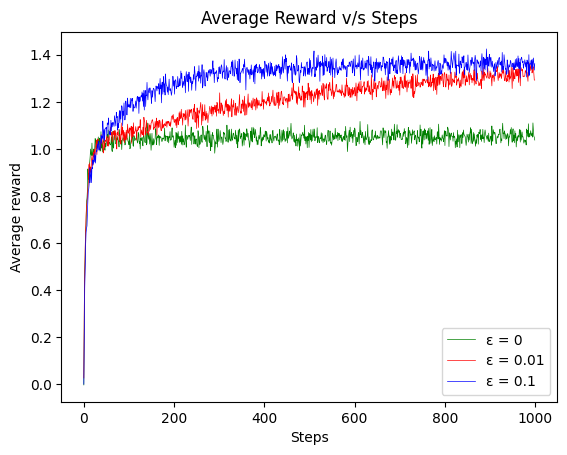

In [ ]:
style = {'0': 'g-', '0.01': 'r-', '0.1': 'b-'}
fig, ax = plt.subplots()
for k,v in rewards_list.items():
  ax.plot(v, style[f'{k}'], label=f'ε = {k}', linewidth=0.5)

ax.legend()
plt.xlabel('Steps')
plt.title('Average Reward v/s Steps')
plt.ylabel("Average reward")
plt.show()

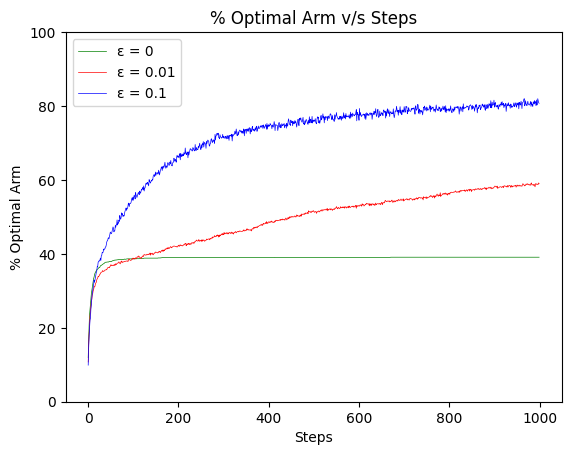

In [ ]:
style = {'0': 'g-', '0.01': 'r-', '0.1': 'b-'}
fig, ax = plt.subplots()
for k,v in arms_chosen.items():
  ax.plot(v*100, style[f'{k}'], label=f'ε = {k}', linewidth=0.5)

ax.legend()
plt.ylim(0,100)
plt.title('% Optimal Arm v/s Steps')
plt.xlabel('Steps')
plt.ylabel("% Optimal Arm")
plt.show()

### Observations from problem-1



The first plot, which charts Average Rewards against the number of steps taken, reveals a notable trend. As we progress through the steps, there is an increase in the average rewards earned. However, it's crucial to differentiate between the behavior of the purely greedy method (epsilon=0) and the epsilon-greedy methods with epsilon values of 0.01 and 0.1.

The purely greedy approach, denoted by epsilon=0, initially performed better than the other two. However, it reached a plateau at a relatively low average reward value, around 1. This plateau is a direct consequence of the purely greedy strategy consistently selecting suboptimal actions. In fact, this method opted for suboptimal actions over 60% of the time, as depicted in the second graph.

In contrast, the epsilon-greedy methods (epsilon = 0.01 and 0.1) continued to demonstrate improvements over time. The reason behind this lies in their balanced approach to exploration and exploitation. By occasionally selecting suboptimal actions (in line with their exploration rates), these methods were able to continue learning and eventually discover the optimal arm. This exploration strategy facilitated the steady improvement in average rewards.

In summary, the observations highlight the significance of a well-tuned balance between exploration and exploitation in reinforcement learning. While the purely greedy strategy initially advances quickly, it ultimately stagnates due to its lack of exploration. In contrast, the epsilon-greedy methods, with controlled exploration, exhibit continued progress and ultimately find the optimal solution, reaffirming the efficacy of epsilon-greedy strategies in navigating the exploration-exploitation trade-off.

## Problem 2 [35 Marks]

Run the UCB algorithm on the ten-armed testbed. Plot the learning curve for UCB and compare it with $\epsilon$-greedy for $\epsilon = 0.1$. Reproduce the following learning curves averaged over 2000  bandits for 1000 timesteps:

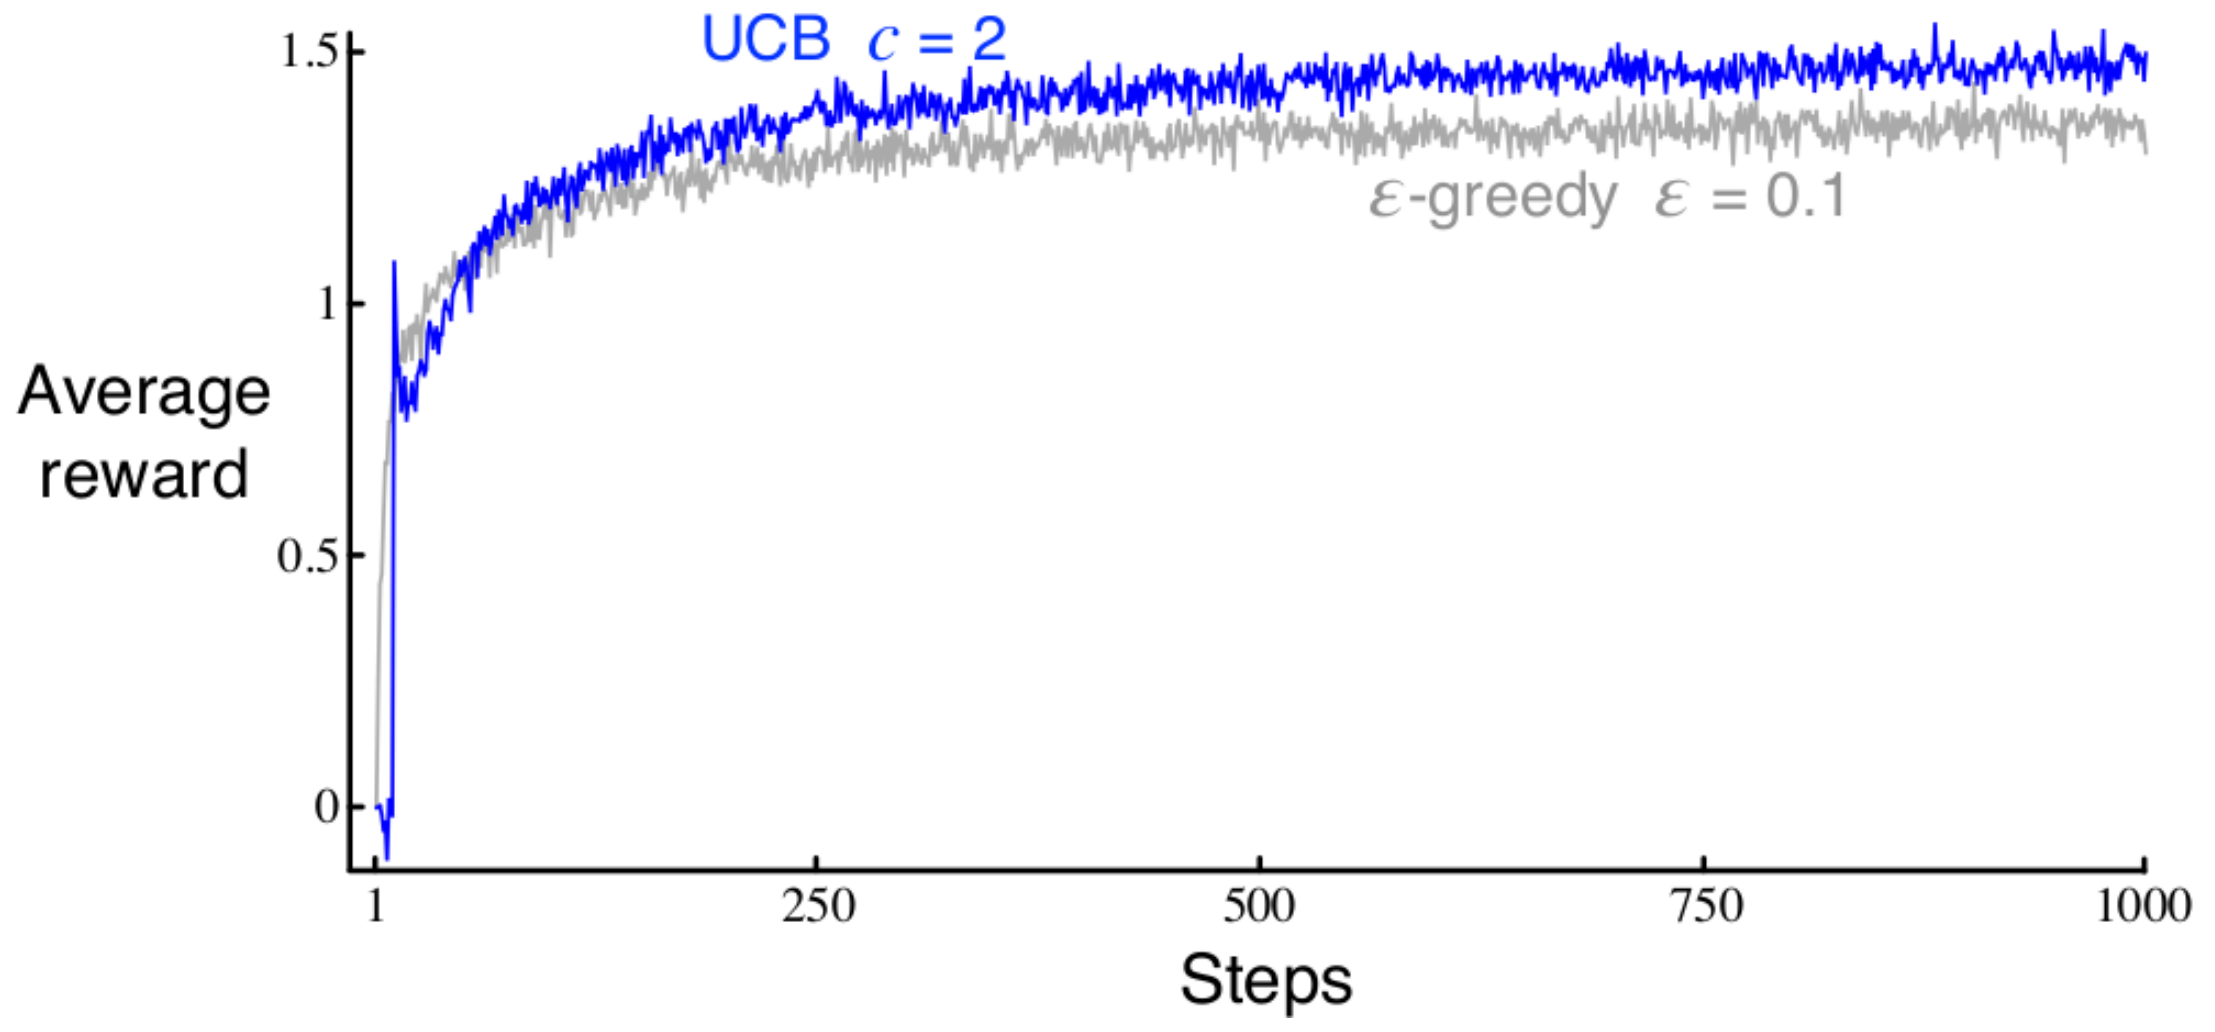

***Note:*** Refer to the textbook version of UCB algorithm.

In [ ]:
with np.errstate(all='ignore'):
  rewards_list1, arms_chosen1 = testbed(num_bandits=2000, num_arms=10, epsilon=[0], num_steps=1000, method='ucb')
  rewards_list2, arms_chosen2 = testbed(num_bandits=2000, num_arms=10, epsilon=[0.1], num_steps=1000, method='eg')

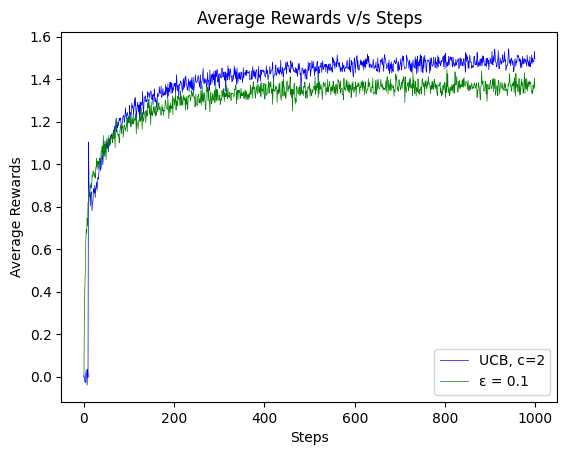

In [ ]:
plt.plot(rewards_list1['0'], 'b-', label='UCB, c=2', linewidth=0.5)
plt.plot(rewards_list2['0.1'], 'g-', label='ε = 0.1', linewidth=0.5)
plt.ylabel('Average Rewards')
plt.xlabel('Steps')
plt.title('Average Rewards v/s Steps')
plt.legend()
plt.show()

### Observations from problem-2

In these early stages, the UCB algorithm displayed noticeable spikes and exhibited some degree of fluctuation. This behavior can be attributed to the initialization phase, where the term denoted as "Nt(a)" (representing the number of times an action "a" has been selected) is set to zero for all actions. Consequently, this causes the square root term in the UCB formula to be the square root of infinity. As a result, the UCB values for each action are exceptionally high, forcing the algorithm to explore each arm at least once.

Given that we are operating within a 10-arm testbed, it is reasonable to infer that the distinct spike observed in the early steps of the UCB algorithm corresponds to the 11th step. By this point, each arm would have been explored at least once, which aligns with the unique characteristics of the UCB approach in its exploration strategy.

## Bonus Problem [10 Marks]

Solve problems 1 and 2 for $10,000$ arms. Appropriately choose number of samples/epochs for each problem.

In [ ]:
# write your code here for the bonus problem
# Takes about 90 mins
with np.errstate(all='ignore'):
  rewards_list3, arms_chosen3 = testbed(num_bandits=1000, num_arms=10000, epsilon=[0], num_steps=100000, method='ucb')


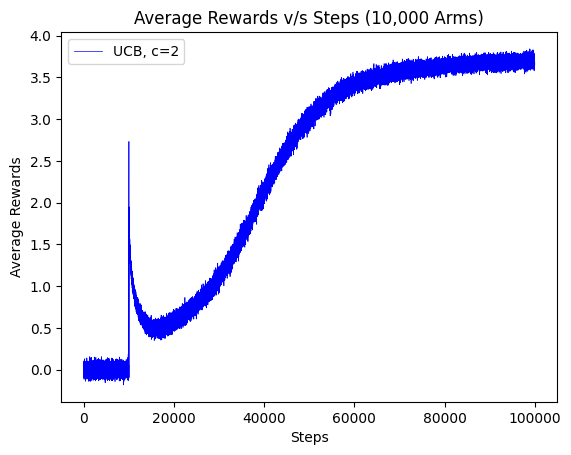

In [ ]:
plt.plot(rewards_list3['0'], 'b-', label='UCB, c=2', linewidth=0.5)
plt.ylabel('Average Rewards')
plt.xlabel('Steps')
plt.title('Average Rewards v/s Steps (10,000 Arms)')
plt.legend()
plt.show()

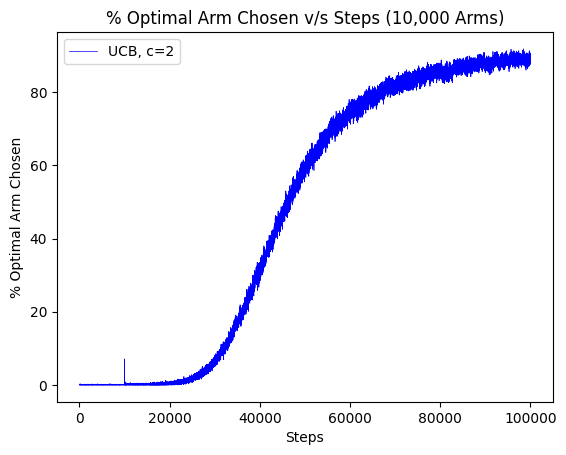

In [ ]:
plt.plot(arms_chosen3['0']*100, 'b-', label='UCB, c=2', linewidth=0.5)
plt.ylabel('% Optimal Arm Chosen')
plt.xlabel('Steps')
plt.title('% Optimal Arm Chosen v/s Steps (10,000 Arms)')
plt.legend()
plt.show()

In [ ]:
# Takes about 25 mins
rewards_list4, arms_chosen4 = testbed(num_bandits=1000, num_arms=10000, epsilon=[0.1], num_steps=100000, method='eg')


In [ ]:
# Takes about 25 mins
rewards_list5, arms_chosen5 = testbed(num_bandits=1000, num_arms=10000, epsilon=[0.01], num_steps=100000, method='eg')

In [ ]:
# Takes about 25 mins
rewards_list6, arms_chosen6 = testbed(num_bandits=1000, num_arms=10000, epsilon=[0], num_steps=100000, method='eg')

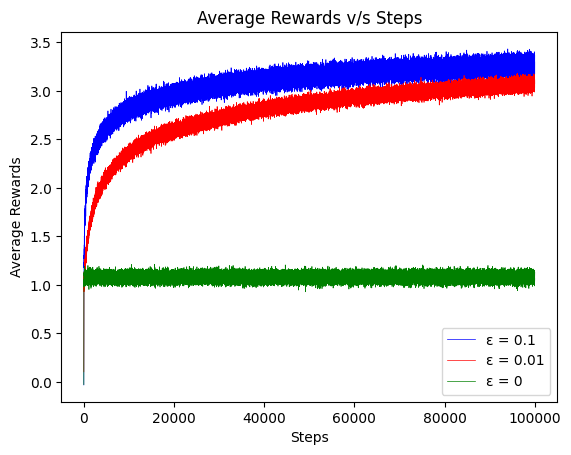

In [ ]:
plt.plot(rewards_list4['0.1'], 'b-', label='ε = 0.1', linewidth=0.5)
plt.plot(rewards_list5['0.01'], 'r-', label='ε = 0.01', linewidth=0.5)
plt.plot(rewards_list6['0'], 'g-', label='ε = 0', linewidth=0.5)
plt.ylabel('Average Rewards')
plt.xlabel('Steps')
plt.title('Average Rewards v/s Steps')
plt.legend()
plt.show()

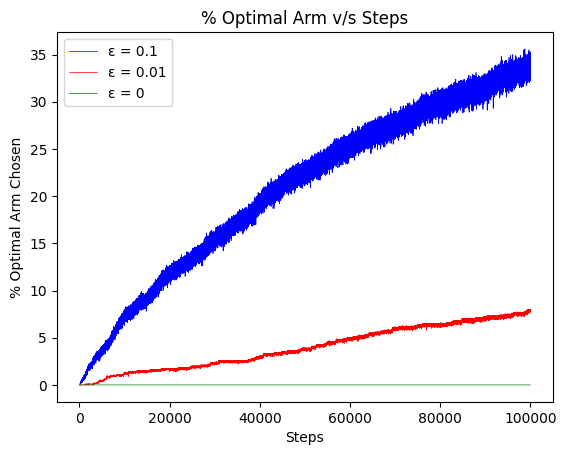

In [ ]:
plt.plot(arms_chosen4['0.1']*100, 'b-', label='ε = 0.1', linewidth=0.5)
plt.plot(arms_chosen5['0.01']*100, 'r-', label='ε = 0.01', linewidth=0.5)
plt.plot(arms_chosen6['0']*100, 'g-', label='ε = 0', linewidth=0.5)
plt.ylabel('% Optimal Arm Chosen')
plt.xlabel('Steps')
plt.title('% Optimal Arm v/s Steps')
plt.legend()
plt.show()

### Observations from bonus problem

**UCB:**

As anticipated, the noticeable spike in the UCB graph aligns with the point at which each of the 10,000 arms has been sampled at least once. This phenomenon highlights a fundamental characteristic of the UCB algorithm—initially, a significant number of steps are required solely to ensure that each arm receives an initial exploration. To gain better insights into the behavior of UCB, I decided to work with a lower number of arms and a higher number of steps. This choice enabled a more comprehensive understanding of the algorithm's trends.

The percentage of times the optimal arm is chosen, as evidenced by the corresponding graph, highlights the progressive nature of UCB. As we approach the 100,000th step, the algorithm consistently selects the optimal arm more than 80% of the time. This demonstrates the algorithm's capacity to adapt and favor optimal actions through its refined exploration-exploitation strategy.

**Epsilon-Greedy:**

In epsilon greedy methods, exploration happens with probability epsilon. Consider epsilon=0.1. In such a case, over 100,000 steps, the expected number times a non estimated value maximizing arm was explored is 10,000. Hence I do not feel 100,000 steps are sufficient. This is further evident from the % Optimal Arm Chosen graph. Even in the best case scenario (epsilon = 0.1), over 60% of the time a suboptimal arm was chosen even after 100,000 steps. However given Colab's restrictions, I've only produced the graph for 100,000 steps.
